# Valeurs manquantes

In [2]:
import pandas as pd
import seaborn
data = pd.read_csv("AmesHousing.txt", delimiter="\t")
train = data[0:1460]
test = data[1460:]


numerical_cols = train.select_dtypes(include=['int64', 'float64'])
numerical_cols = numerical_cols.drop(["PID", "Year Built", "Year Remod/Add", "Garage Yr Blt", 
             "Mo Sold", "Yr Sold"], axis=1)

null_series = numerical_cols.isnull().sum()
full_cols_series = null_series[null_series == 0]
full_cols_series



Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64

# Corrélation des colonnes de caractéristiques avec la colonne cible

In [3]:
train_subset = train[full_cols_series.index]

In [4]:
full_cols_series.index

Index(['Order', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice'],
      dtype='object')

In [5]:
train_subset

,Order,MS SubClass,Lot Area,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
0,1,20,31770,6,5,1656,0,0,1656,1,...,2.0,528.0,210,62,0,0,0,0,0,215000
1,2,20,11622,5,6,896,0,0,896,1,...,1.0,730.0,140,0,0,0,120,0,0,105000
2,3,20,14267,6,6,1329,0,0,1329,1,...,1.0,312.0,393,36,0,0,0,0,12500,172000
3,4,20,11160,7,5,2110,0,0,2110,2,...,2.0,522.0,0,0,0,0,0,0,0,244000
4,5,60,13830,5,5,928,701,0,1629,2,...,2.0,482.0,212,34,0,0,0,0,0,189900
5,6,60,9978,6,6,926,678,0,1604,2,...,2.0,470.0,360,36,0,0,0,0,0,195500
6,7,120,4920,8,5,1338,0,0,1338,2,...,2.0,582.0,0,0,170,0,0,0,0,213500
7,8,120,5005,8,5,1280,0,0,1280,2,...,2.0,506.0,0,82,0,0,144,0,0,191500
8,9,120,5389,8,5,1616,0,0,1616,2,...,2.0,608.0,237,152,0,0,0,0,0,236500
9,10,60,7500,7,5,1028,776,0,1804,2,...,2.0,442.0,140,60,0,0,0,0,0,189000


In [6]:
corrmat = train_subset.corr()

In [7]:
corrmat

,Order,MS SubClass,Lot Area,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
Order,1.000000,-0.023140,0.020064,-0.049116,0.078547,-0.060288,0.011011,0.016425,-0.036472,-0.074932,...,-0.058123,-0.051493,-0.064436,0.035471,0.013040,0.006725,0.026088,0.020716,-0.020449,-0.068181
MS SubClass,-0.023140,1.000000,-0.248209,0.054533,-0.099862,-0.273248,0.342229,-0.001077,0.089580,0.168263,...,-0.046967,-0.110141,-0.034953,0.000592,0.009778,-0.051771,-0.065956,-0.022696,-0.023721,-0.088504
Lot Area,0.020064,-0.248209,1.000000,0.100290,-0.010353,0.295995,0.005407,-0.013667,0.239224,0.107753,...,0.166939,0.179216,0.110003,0.044313,0.002098,0.022090,0.054119,0.010442,0.025428,0.274730
Overall Qual,-0.049116,0.054533,0.100290,1.000000,-0.083581,0.490056,0.200105,-0.070362,0.562903,0.505102,...,0.609088,0.581106,0.260258,0.319954,-0.173024,0.032751,0.023194,0.072357,-0.009641,0.804562
Overall Cond,0.078547,-0.099862,-0.010353,-0.083581,1.000000,-0.154903,-0.009733,-0.015807,-0.133710,-0.223043,...,-0.156004,-0.132401,0.045171,-0.013770,0.052764,0.033923,0.064596,-0.013420,0.047354,-0.099395
1st Flr SF,-0.060288,-0.273248,0.295995,0.490056,-0.154903,1.000000,-0.311660,-0.011781,0.515404,0.341061,...,0.441351,0.477281,0.206013,0.191891,-0.118127,0.053525,0.120276,0.092472,-0.000546,0.657119
2nd Flr SF,0.011011,0.342229,0.005407,0.200105,-0.009733,-0.311660,1.000000,-0.017831,0.647971,0.396149,...,0.169252,0.100471,0.086069,0.189739,0.074540,-0.038210,-0.014297,-0.020832,0.002249,0.202352
Low Qual Fin SF,0.016425,-0.001077,-0.013667,-0.070362,-0.015807,-0.011781,-0.017831,1.000000,0.075539,-0.013896,...,-0.047518,-0.049463,-0.029479,-0.014001,0.144095,-0.000762,-0.026807,-0.002486,-0.007269,-0.060352
Gr Liv Area,-0.036472,0.089580,0.239224,0.562903,-0.133710,0.515404,0.647971,0.075539,1.000000,0.625981,...,0.498711,0.465366,0.238396,0.321806,-0.012603,0.008241,0.080250,0.054693,0.000851,0.698990
Full Bath,-0.074932,0.168263,0.107753,0.505102,-0.223043,0.341061,0.396149,-0.013896,0.625981,1.000000,...,0.468295,0.402743,0.180358,0.255968,-0.139366,0.043506,-0.037269,-0.027145,-0.020655,0.518194


In [8]:
res = corrmat['SalePrice'].abs().sort_values()

In [18]:
print(res)

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64


# HEATMAP

In [9]:
strong_corrs = res[res >= 0.3]
strong_corrs.index
train_subset = train[strong_corrs.index]
corr_bis = train_subset.corr()
res = corr_bis['SalePrice'].abs().sort_values()

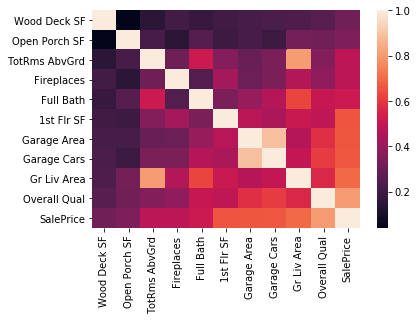

In [10]:
seaborn.heatmap(corr_bis)

In [50]:
type(res)

pandas.core.series.Series

In [48]:
strong_corrs.index

Index(['Wood Deck SF', 'Open Porch SF', 'TotRms AbvGrd', 'Fireplaces',
       'Full Bath', '1st Flr SF', 'Garage Area', 'Garage Cars', 'Gr Liv Area',
       'Overall Qual', 'SalePrice'],
      dtype='object')

# Entrainer et tester le modèle

In [108]:
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])

In [109]:
test[final_corr_cols.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
Wood Deck SF     1470 non-null int64
Open Porch SF    1470 non-null int64
Fireplaces       1470 non-null int64
Full Bath        1470 non-null int64
1st Flr SF       1470 non-null int64
Garage Area      1469 non-null float64
Gr Liv Area      1470 non-null int64
Overall Qual     1470 non-null int64
SalePrice        1470 non-null int64
dtypes: float64(1), int64(8)
memory usage: 103.4 KB


In [199]:
clean_test = test[final_corr_cols.index]

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = final_corr_cols.drop(['SalePrice']).index
clean_test = clean_test.dropna()
lr = LinearRegression()


In [112]:
lr.fit(train[features], train['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
from math import *

prediction_train = lr.predict(train[features])
prediction_test = lr.predict(clean_test[features])


train_rmse = sqrt(mean_squared_error(prediction_train, train['SalePrice']))
test_rmse = sqrt(mean_squared_error(prediction_test, clean_test['SalePrice']))

In [114]:
print(train_rmse)
print(test_rmse)

34173.97629185852
41032.0261201977


In [155]:
lol = (train[features]-train[features].min())/(train[features].max()-train[features].min())

In [156]:
import numpy as np
sorted_vars = lol.var().sort_values()

In [157]:
print(sorted_vars)

Open Porch SF    0.013938
Full Bath        0.018621
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64


# Modèle final

In [193]:
lr = LinearRegression()

In [194]:
features = sorted_vars.drop('Open Porch SF').index

In [195]:
lr.fit(train[features], train['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [200]:
train_prediction = lr.predict(train[features])

clean_test = clean_test.dropna()
test_prediction = lr.predict(clean_test[features])

In [201]:
train_rmse_2 = sqrt(mean_squared_error(train_prediction, train['SalePrice']))
test_rmse_2 = sqrt(mean_squared_error(test_prediction, clean_test['SalePrice']))

In [202]:
print(train_rmse_2)
print(test_rmse_2)

34372.696707783965
40591.42702437741


In [191]:
final_corr_cols

Wood Deck SF     0.319104
Open Porch SF    0.344383
Fireplaces       0.485683
Full Bath        0.518194
1st Flr SF       0.657119
Garage Area      0.662397
Gr Liv Area      0.698990
Overall Qual     0.804562
SalePrice        1.000000
Name: SalePrice, dtype: float64